/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: Mean of empty slice
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Text(0.5, 1.0, 'bestID=77')

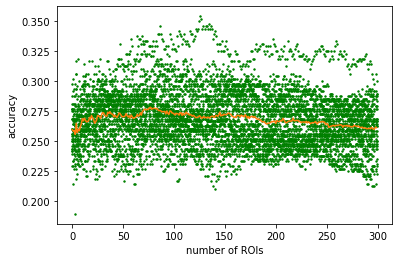

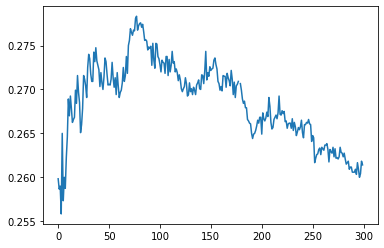

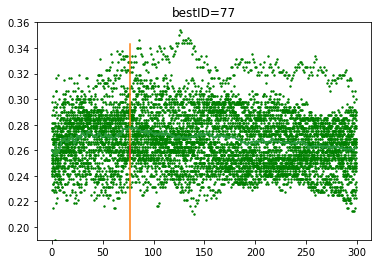

In [3]:
# code to load and compare the result of above:
from glob import glob
import numpy as np
# di="/gpfs/milgram/project/turk-browne/jukebox/ntb/projects/sketchloop02/subjects/"
# subs=glob(f"{di}[0,1]*_neurosketch")
# subs=[sub.split("/")[-1].split("_")[0] for sub in subs]
# subjects=""
# for sub in subs:
#     subjects=subjects+sub+" "


testDir='/gpfs/milgram/project/turk-browne/projects/rtTest/'
subjects_correctly_aligned=['1206161','0119173','1206162','1130161','1206163','0120171','0111171','1202161','0125172','0110172','0123173','0120173','0110171','0119172','0124171','0123171','1203161','0118172','0118171','0112171','1207162','0117171','0119174','0112173','0112172']
subs=subjects_correctly_aligned
subjects=subs #["0110171", "0110172", "0111171"]
hemis=["lh", "rh"]
tag="GM"
# wangAcc=np.zeros((50,len(subs)))
# roiloc="wang2014"
# for sub_i,sub in enumerate(subjects):
#     for num in range(1,51):
#         try:
#             wangAcc[num-1,sub_i]=np.load(f"{testDir}{roiloc}/{sub}/output/uniMaskRank_{tag}_top{num}.npy")
#         # print(f"{roiloc} {sub} {num} ROIs acc={wangAcc[num-1,sub_i]}")
#         except:
#             pass

schaeferAcc=np.zeros((300,len(subs)))
roiloc="schaefer2018"
for sub_i,sub in enumerate(subjects):
    for num in range(1,301):
        try:
            schaeferAcc[num-1,sub_i]=np.load(f"{testDir}{roiloc}/{sub}/output/uniMaskRank_{tag}_top{num}.npy")
        # print(f"{roiloc} {sub} {num} ROIs acc={schaeferAcc[num-1,sub_i]}")
        except:
            pass


wangAcc=wangAcc[:,wangAcc[0]!=0]
schaeferAcc=schaeferAcc[:,schaeferAcc[0]!=0]
schaeferAcc[schaeferAcc==0]=None

import matplotlib.pyplot as plt
plt.plot(np.nanmean(wangAcc,axis=1))
plt.plot(np.nanmean(schaeferAcc,axis=1))


for i in range(schaeferAcc.shape[0]):
    plt.scatter([i]*schaeferAcc.shape[1],schaeferAcc[i],c='g',s=2)
for i in range(wangAcc.shape[0]):
    plt.scatter([i]*wangAcc.shape[1],wangAcc[i],c='b',s=2)

plt.xlabel("number of ROIs")
plt.ylabel("accuracy")
# plt.savefig('SummaryAccuracy.png')


plt.figure()
plt.plot(np.mean(schaeferAcc,axis=1))
plt.plot(np.mean(wangAcc,axis=1))


schaeferAcc_mean=np.mean(schaeferAcc,axis=1)
bestID=np.where(schaeferAcc_mean==np.nanmax(schaeferAcc_mean))[0][0]
_=plt.figure()
for i in range(schaeferAcc.shape[0]):
    plt.scatter([i]*schaeferAcc.shape[1],schaeferAcc[i],c='g',s=2)
plt.plot(np.arange(schaeferAcc.shape[0]),np.nanmean(schaeferAcc,axis=1))
plt.ylim([0.19,0.36])
plt.plot([bestID]*10,np.arange(0.19,0.36,(0.36-0.19)/10))


plt.plot(np.arange(schaeferAcc.shape[0]),np.nanmean(schaeferAcc,axis=1))
plt.plot([bestID]*10,np.arange(0.255,0.264,(0.264-0.255)/10))
plt.title(f"bestID={bestID}")


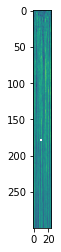

In [4]:
plt.imshow(schaeferAcc)